<a href="https://colab.research.google.com/github/mdsiamahmed26/Visualization-of-Biomechanical-and-Force-Plate-Data-/blob/main/biomechanical_data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


2025-08-02 19:26:11.684 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:26:11.686 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:26:11.839 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-02 19:26:11.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:26:11.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:26:11.845 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:26:11.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

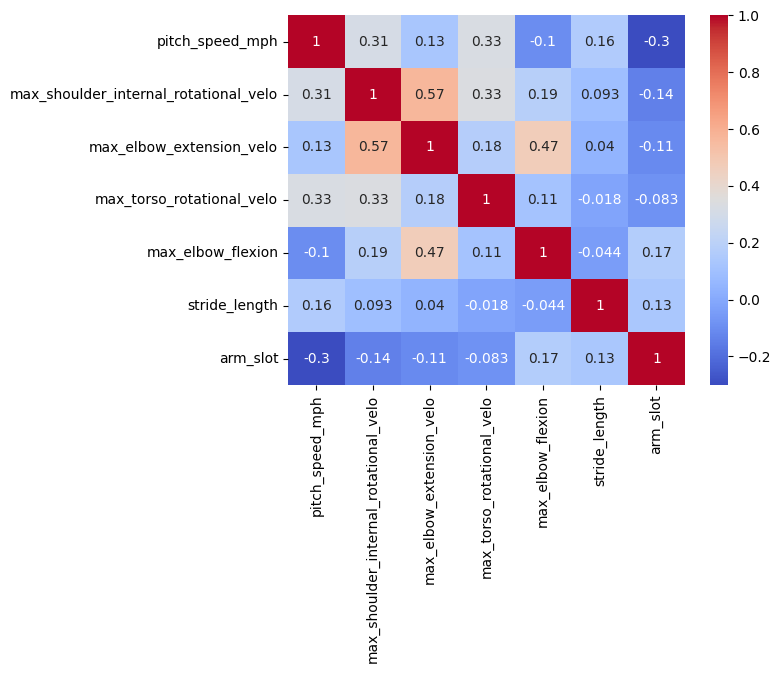

In [4]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("/content/poi_metrics (1) (6).csv")
st.set_page_config(layout="wide")
st.title("Biomechanical Pitch Analysis Dashboard")

st.sidebar.header("Filters")
selected_pitch_types = st.sidebar.multiselect(
    "Pitch Types", options=df["pitch_type"].unique(), default=df["pitch_type"].unique()
)
selected_arm = st.sidebar.multiselect(
    "Throwing Arm", options=df["p_throws"].unique(), default=df["p_throws"].unique()
)
pitch_speed_range = st.sidebar.slider(
    "Pitch Speed Range (mph)",
    min_value=float(df["pitch_speed_mph"].min()),
    max_value=float(df["pitch_speed_mph"].max()),
    value=(float(df["pitch_speed_mph"].min()), float(df["pitch_speed_mph"].max())),
)

filtered_df = df[
    (df["pitch_type"].isin(selected_pitch_types)) &
    (df["p_throws"].isin(selected_arm)) &
    (df["pitch_speed_mph"].between(pitch_speed_range[0], pitch_speed_range[1]))
]

fig1 = px.histogram(filtered_df, x="pitch_speed_mph", nbins=30, title="Pitch Speed Distribution")

fig2 = px.scatter(
    filtered_df,
    x="rear_grf_mag_max",
    y="lead_grf_mag_max",
    color="p_throws",
    title="Lead vs Rear GRF Magnitude",
    labels={"rear_grf_mag_max": "Rear GRF Max", "lead_grf_mag_max": "Lead GRF Max"}
)

fig3 = px.box(
    filtered_df,
    x="p_throws",
    y="pitch_speed_mph",
    color="p_throws",
    title="Pitch Speed by Throwing Arm",
    labels={"p_throws": "Throwing Arm", "pitch_speed_mph": "Pitch Speed (mph)"}
)

st.subheader("Correlation Heatmap of Key Metrics")
corr_vars = [
    "pitch_speed_mph",
    "max_shoulder_internal_rotational_velo",
    "max_elbow_extension_velo",
    "max_torso_rotational_velo",
    "max_elbow_flexion",
    "stride_length",
    "arm_slot"
]
corr = filtered_df[corr_vars].corr()

fig4, ax = plt.subplots()
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
st.pyplot(fig4)

st.subheader("Exploratory Visualizations")
col1, col2 = st.columns(2)
with col1:
    st.plotly_chart(fig1, use_container_width=True)
    st.plotly_chart(fig2, use_container_width=True)
with col2:
    st.plotly_chart(fig3, use_container_width=True)

In [7]:
!pip install plotly seaborn --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


Saving poi_metrics (1) (6).csv to poi_metrics (1) (6) (1).csv


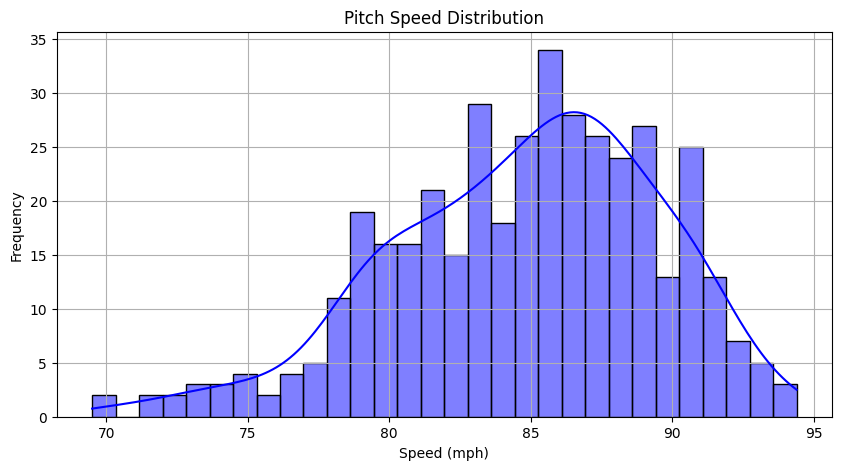

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df["pitch_speed_mph"], bins=30, kde=True, color="blue")
plt.title("Pitch Speed Distribution")
plt.xlabel("Speed (mph)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [9]:
fig = px.scatter(
    df, x="rear_grf_mag_max", y="lead_grf_mag_max",
    color="p_throws", symbol="pitch_type",
    title="Lead vs Rear GRF Magnitude"
)
fig.show()


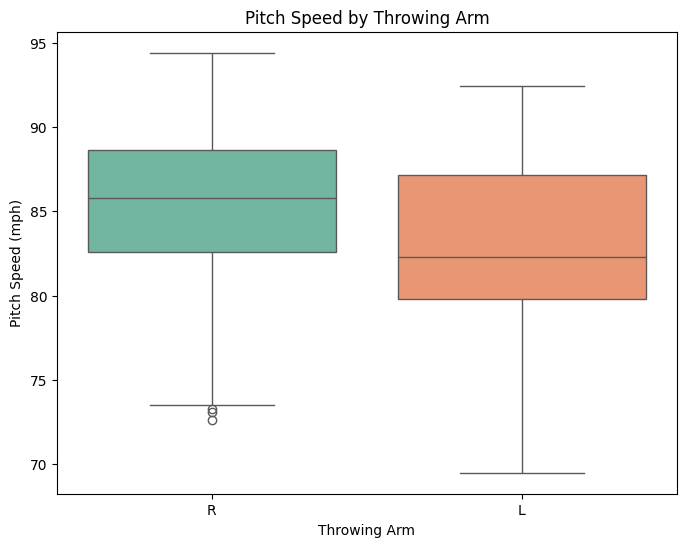

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="p_throws", y="pitch_speed_mph", data=df, hue="p_throws", palette="Set2", legend=False)
plt.title("Pitch Speed by Throwing Arm")
plt.xlabel("Throwing Arm")
plt.ylabel("Pitch Speed (mph)")
plt.show()




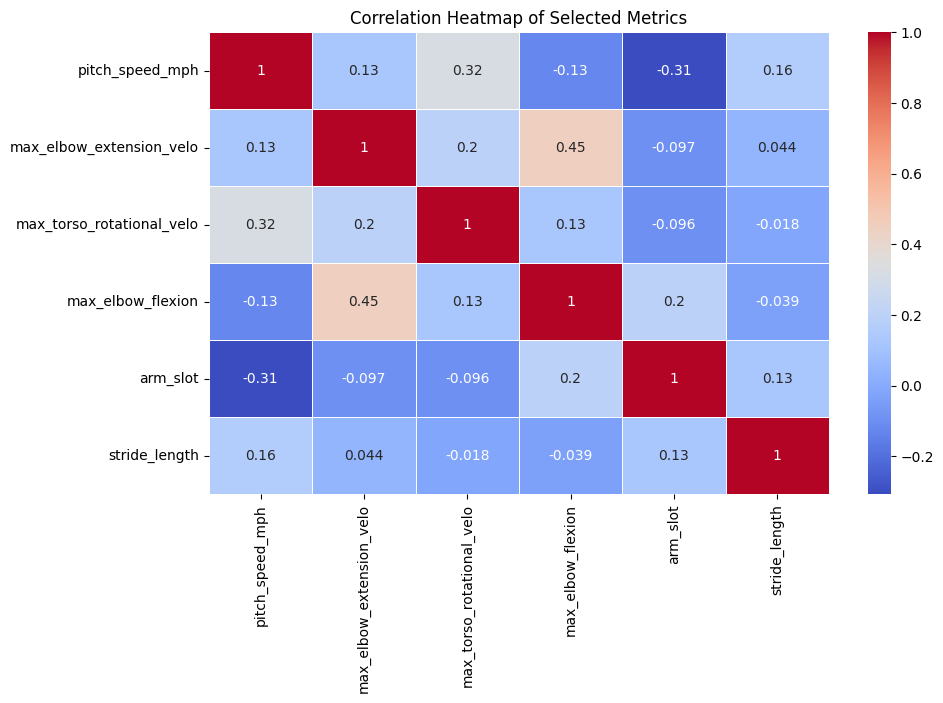

In [13]:
selected = [
    "pitch_speed_mph", "max_elbow_extension_velo",
    "max_torso_rotational_velo", "max_elbow_flexion",
    "arm_slot", "stride_length"
]
corr = df[selected].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Metrics")
plt.show()


In [14]:
fig = px.scatter_3d(
    df, x="arm_slot", y="rear_grf_mag_max", z="pitch_speed_mph",
    color="p_throws", symbol="pitch_type",
    title="3D Scatter: Arm Slot vs Rear GRF vs Speed"
)
fig.show()


In [15]:
sample = df.iloc[0]
metrics = [
    "max_shoulder_internal_rotational_velo",
    "max_elbow_extension_velo",
    "max_torso_rotational_velo",
    "max_elbow_flexion",
    "stride_length"
]
values = sample[metrics].values.tolist()

fig = go.Figure(data=go.Scatterpolar(
      r=values,
      theta=metrics,
      fill='toself',
      name='Biomechanical Profile'
))
fig.update_layout(
  polar=dict(radialaxis=dict(visible=True)),
  title="Radar Plot: Biomechanical Profile of One Pitch"
)
fig.show()


In [17]:
!pip install panel jupyter_bokeh seaborn plotly pandas matplotlib --quiet

import panel as pn
pn.extension('plotly')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.5 MB/s eta 0:00:00


In [19]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.dropna(inplace=True)



Saving poi_metrics (1) (6).csv to poi_metrics (1) (6) (2).csv


In [20]:
pitch_type = pn.widgets.MultiChoice(name='Pitch Type', options=list(df["pitch_type"].unique()), value=list(df["pitch_type"].unique()))
p_throws = pn.widgets.CheckBoxGroup(name='Throwing Arm', options=list(df["p_throws"].unique()), value=list(df["p_throws"].unique()))
pitch_speed = pn.widgets.RangeSlider(name='Pitch Speed (mph)', start=float(df['pitch_speed_mph'].min()), end=float(df['pitch_speed_mph'].max()), value=(float(df['pitch_speed_mph'].min()), float(df['pitch_speed_mph'].max())))


In [21]:
def update_dashboard(pitch_type, p_throws, pitch_speed):
    filtered = df[
        (df["pitch_type"].isin(pitch_type)) &
        (df["p_throws"].isin(p_throws)) &
        (df["pitch_speed_mph"].between(pitch_speed[0], pitch_speed[1]))
    ]

    fig1 = px.histogram(filtered, x="pitch_speed_mph", nbins=30, title="Pitch Speed Distribution")
    fig2 = px.scatter(filtered, x="rear_grf_mag_max", y="lead_grf_mag_max", color="p_throws", title="Lead vs Rear GRF")
    fig3 = px.box(filtered, x="p_throws", y="pitch_speed_mph", color="p_throws", title="Pitch Speed by Throwing Arm")

    return pn.Column(
        fig1,
        fig2,
        fig3
    )


In [22]:
dashboard = pn.Row(
    pn.Column(pitch_type, p_throws, pitch_speed),
    pn.bind(update_dashboard, pitch_type, p_throws, pitch_speed)
)

dashboard.servable()


Row
    [0] Column
        [0] MultiChoice(name='Pitch Type', options=['FF'], value=['FF'])
        [1] CheckBoxGroup(name='Throwing Arm', options=['R', 'L'], value=['R', 'L'])
        [2] RangeSlider(end=94.4, name='Pitch Speed (mph)', start=69.5, value=(69.5, 94.4), value_end=94.4, value_start=69.5)
    [1] ParamFunction(function, _pane=Column, defer_load=False)